# Lab 2: Feature Processing

## Feature standardization

The `vinho verde` data set contains physico-chemical information on a number of Portuguese wines, as well as their rating by human tasters. 

Our goal is to use these data to automatically predict the rating of a wine, so as to assist oenologists, improve wine production, and target the taste of niche consumers.

This data set has been made available on the UCI archive repository (it is one of the oldest and most well-known repository of ML problems).

It is available from: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ (but already in your repository; we will focus on white wines here).

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/winequality-white.csv', sep=";")

In [3]:
type(data)

pandas.core.frame.DataFrame

We have loaded the data in a _pandas DataFrame_ object. Let us examine what information is available:

In [4]:
data.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The data contains 12 columns. The first 10 (fixed acidity -- alcohol) are physico-chemical features of the wines; the last one is their rating (or quality).

Let us extract from this data a numpy array that contains the design matrix X:

In [5]:
X = data.values[:, :-1]
print(X.shape)

(4898, 11)


__Question:__ Extract from this data a one-dimensional numpy array that contains the labels y.

In [9]:
# TODO
y = data['quality'].to_numpy()

In [10]:
y = data['quality']

Let us now plot a histogram of the values taken by each of our features:

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


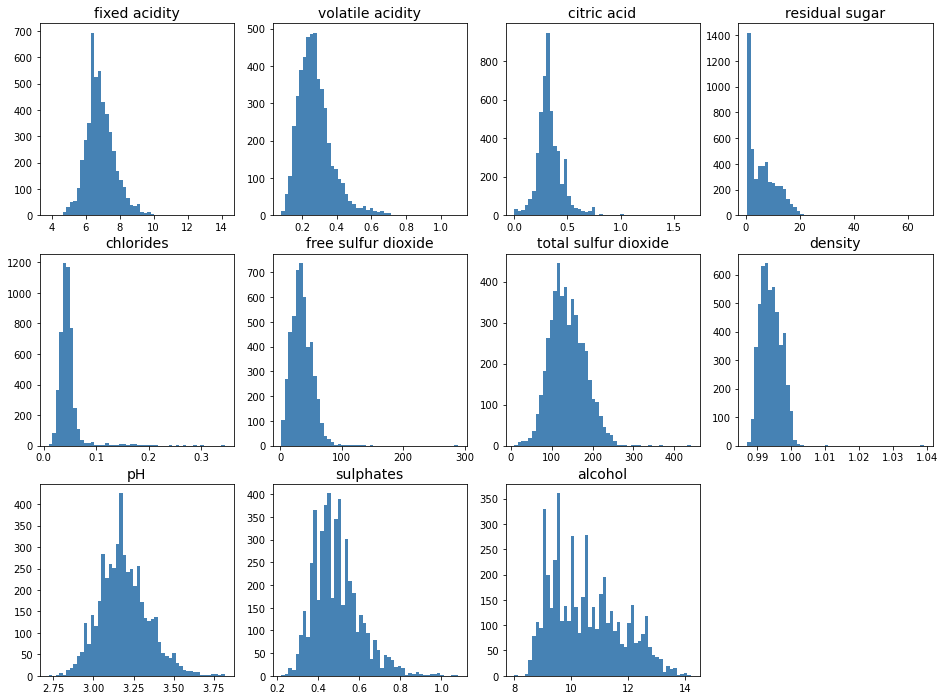

In [12]:
# create a figure of size 16x12
fig = plt.figure(figsize=(16, 12))

for feat_idx in range(X.shape[1]):
    # create a subplot in the (feat_idx+1) position of a 3x4 grid
    ax = fig.add_subplot(3, 4, (feat_idx+1))
    # plot the histogram of feat_idx
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', edgecolor='none')
    # use the name of the feature as a title for each histogram
    ax.set_title(data.columns[feat_idx], fontsize=14)

__Question:__
What are the ranges of values taken by the different features? What do you think is going to happen when one computes the euclidean distance between two samples: will the `free sulfur dioxide` be accounted for in a manner similar to the `sulphates`? How is this going to affect the k-nearest-neighbor algorithm?

__Answer:__

### 5-nearest-neighbor prediction
We will now see how to use scikit-learn to split the data between a train and a test set, train a nearest neighbor regressor on the training data, and evaluate its performance on the test set.

#### Splitting the data

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                    test_size=0.3 # 30% des données dans le jeu de test
                                    )

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3428, 11) (1470, 11) (3428,) (1470,)


#### Creating a 5 nearest neighbor regressor

In [31]:
from sklearn import neighbors

In [32]:
model = neighbors.KNeighborsRegressor(n_neighbors=5)

#### Training the 5-NN regressor on the training data

In [33]:
model.fit(X_train, y_train)

KNeighborsRegressor()

#### Making predictions with the trained model

In [34]:
y_pred = model.predict(X_test)

In [35]:
# Compute the RMSE between the predictions and true value
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.7928764476414278

### Feature standardization

In [36]:
from sklearn import preprocessing

# Create a standardizer object and fit it to the training data.
std_scale = preprocessing.StandardScaler().fit(X_train)

# Apply the standardization to the training and the test data.
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

__Question:__ Why did we fit the standardizer (i.e. computed the mean and standard deviation for each feature) on the training set only?

__Answer:__

__Question:__ Visualize the scaled data again to check that the standardization had the intended effect.

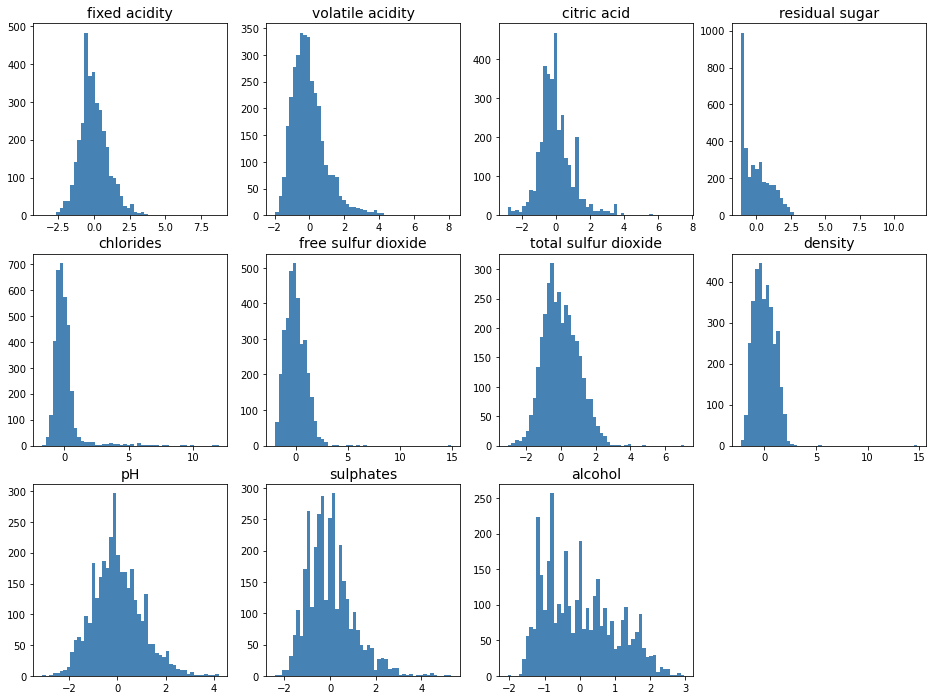

In [37]:
# TODO
# create a figure of size 16x12
fig = plt.figure(figsize=(16, 12))

for feat_idx in range(X_train_std.shape[1]):
    # create a subplot in the (feat_idx+1) position of a 3x4 grid
    ax = fig.add_subplot(3, 4, (feat_idx+1))
    # plot the histogram of feat_idx
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color='steelblue', edgecolor='none')
    # use the name of the feature as a title for each histogram
    ax.set_title(data.columns[feat_idx], fontsize=14)

#### Effect of the feature standardization on the model

__Question:__ Train a new model on the standardized data. Is it better than the one trained on non-standardized data? 

In [38]:
# TODO
model_std = neighbors.KNeighborsRegressor(n_neighbors=5)
model_std.fit(X_train_std, y_train)
y_pred_std = model_std.predict(X_test_std)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.7113845846030713

## Categorical features

We will work with a data set that describes mushrooms according to the shape of their cap and stalk, their odor, the type of their veil, etc. This data set also contains information on whether a mushroom is edible or not, and that is what we will try to predict.

Data are available as `data/mushrooms.csv`. Let us load them in a pandas DataFrame called `df`.

In [39]:
df = pd.read_csv('data/mushrooms.csv')

Let us look at the first few lines of df

In [40]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


As you can see, the features are encoded as _letters_. Each letter correspond to a category . For example, for the `cap shape` feature, `b` corresponds to a bell cap, `c` to a conical cap, `f` to a flat cap, `k` to a knobbed cap, `s` to a sunken cap, and `x` to a convex cap. For more details about their meaning, you can consult [the documentation of the data set](https://archive.ics.uci.edu/ml/datasets/Mushroom).

#### Direct conversion to numerical attributes
In order to work with this data, we need to convert the categorical attributes into numerical values. Here we will simply convert each letter to a number between 0 and the number of categories, using scikit-learn's [preprocessing.LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [41]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

In [42]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### One-hot encoding

This encoding is not necessarily the best, as (for example), an algorithm that uses the Euclidean distance will consider that a convex cap (`x` converted to 5) is closer to a sunken cap (`s` converted to 4) than to a conical cap (`c` converted to 1), and the [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) is a good alternative. However, it has the drawback of increasing the number of features, and of creating correlated features.

In [43]:
# Load the data again
#df = pd.read_csv('data/mushrooms.csv')

ohe_encoder = preprocessing.OneHotEncoder()
X = ohe_encoder.fit_transform(df[df.columns])

In [44]:
X

<8124x119 sparse matrix of type '<class 'numpy.float64'>'
	with 186852 stored elements in Compressed Sparse Row format>

In [45]:
X.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])